# Final Project

# Aylin Yılmaz

# Data

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Read csv
data = pd.read_csv('diamonds.csv')
data

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [13]:
# Check duplicate values and missing data.

data.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
data[data.duplicated()]

,index,carat,cut,color,clarity,depth,table,x,y,z,price


# Exploraty Data Analysis

<AxesSubplot:xlabel='price', ylabel='count'>

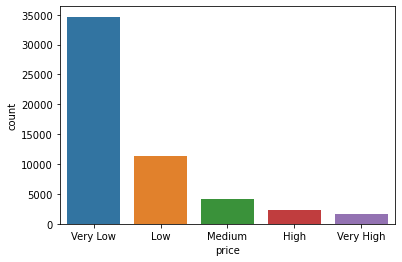

In [15]:
sns.countplot(x ='price', data = data)

In [16]:
# Imbalanced data set.

In [17]:
from sklearn.utils import resample

In [18]:
data['price'].unique()

array(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype=object)

In [19]:
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [20]:
# According to the table we can say that there are outliers in the data set because of difference between 75th percentile and max values of predictors table,y and z.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

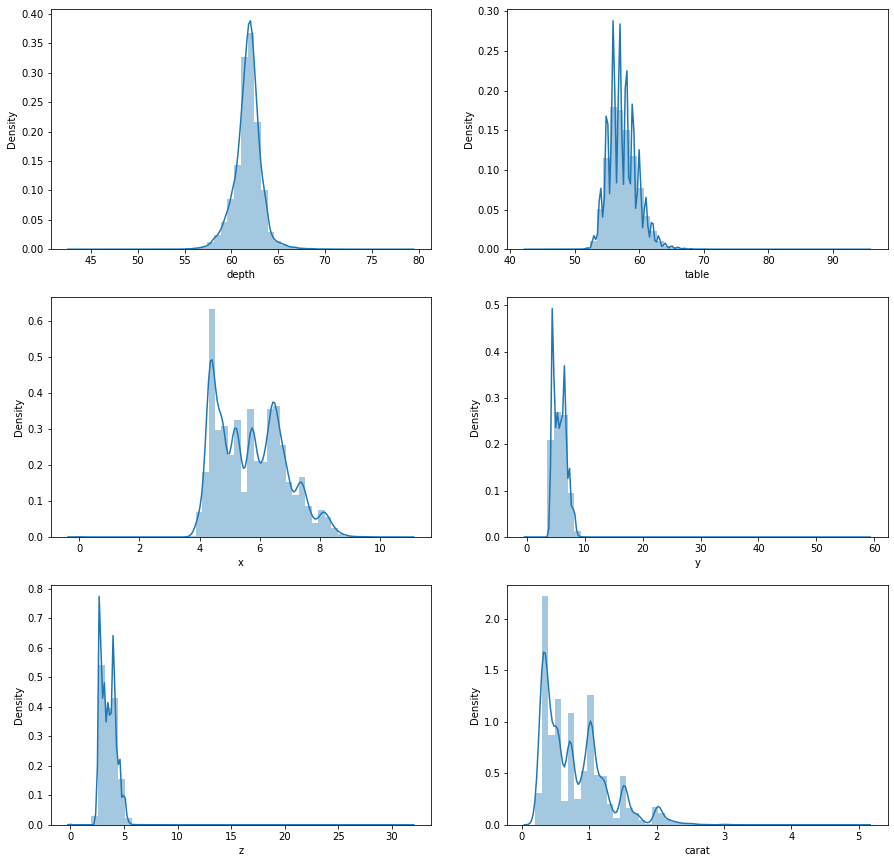

In [21]:
# EDA (distplot) for continuous features

fig,a =  plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, column in enumerate(data.describe().columns):
    if column == 'index':
        continue
    sns.distplot(data[column], ax=a[i//2-1, i%2])
    a[i//2-1, i%2].set_xlabel(str(column))

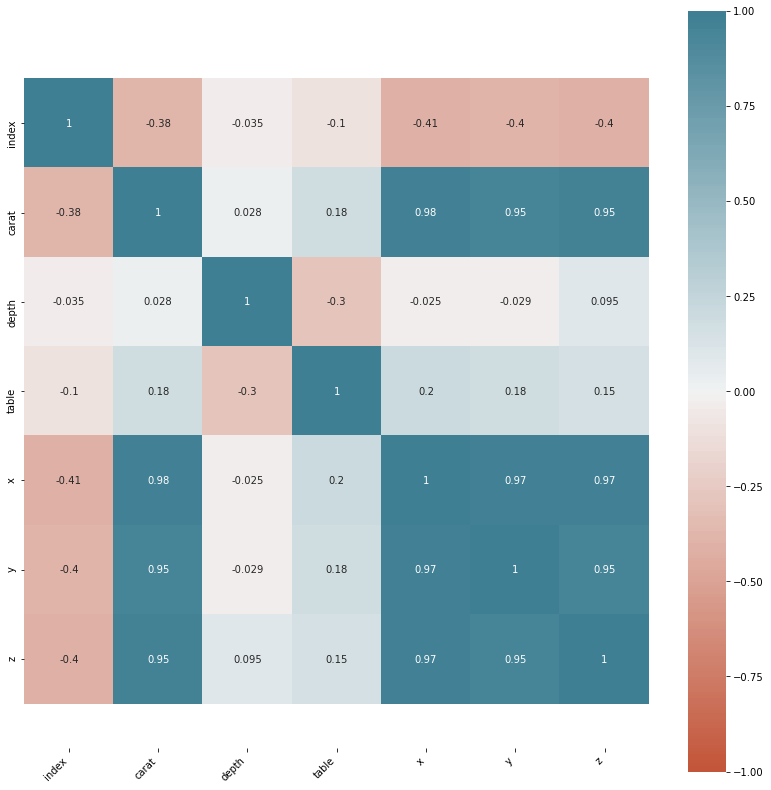

In [22]:
#Correlation of the features
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [23]:
data.duplicated().sum() # there is no duplicated values

0

In [24]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.loc[:, data.describe().columns]))
z

array([[1.7320187 , 1.19816781, 0.17409151, ..., 1.58783745, 1.53619556,
        1.57112919],
       [1.73195448, 1.24036129, 1.36073849, ..., 1.64132529, 1.65877419,
        1.74117497],
       [1.73189025, 1.19816781, 3.38501862, ..., 1.49869105, 1.45739502,
        1.74117497],
       ...,
       [1.73189025, 0.20662095, 0.73334442, ..., 0.06343409, 0.04774083,
        0.03013526],
       [1.73195448, 0.13092691, 0.52310533, ..., 0.37338325, 0.33750627,
        0.28520393],
       [1.7320187 , 0.10113725, 0.31452784, ..., 0.08811478, 0.11861587,
        0.14349912]])

In [25]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

1388

In [26]:
new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

,level_0,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
3,4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
4,5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...
52547,53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
52548,53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
52549,53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
52550,53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


Text(0.5, 1.0, 'Dataset Disribution Without Noisy Examples')

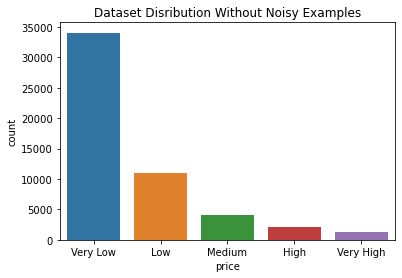

In [27]:
sns.countplot(x ='price', data = new_data)
plt.title('Dataset Disribution Without Noisy Examples')

In [28]:
# still imbalanced data set

Text(0.5, 1.0, 'Sampled Dataset')

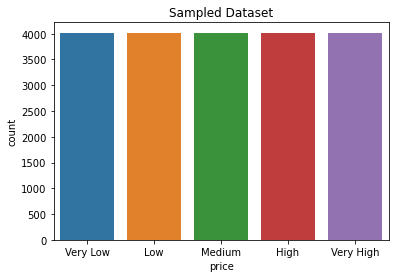

In [29]:
#Undersampling and Oversampling
from sklearn.utils import resample

sampled_data = pd.DataFrame(columns=new_data.columns.array)
min_sample = len(new_data[new_data.price == 'Medium'])
for category in new_data['price'].unique():
    if category == 'Medium':
        sampled_data = pd.concat([sampled_data, new_data[new_data.price == 'Medium']], axis = 0)
        continue
    sampled_data = pd.concat([sampled_data, resample(new_data[new_data.price == category],
    replace = True, # sample with replacement
    n_samples = min_sample, # match number in minority class
    random_state = 27)], axis = 0) # reproducible results
    


sns.countplot(x ='price', data = sampled_data)
sampled_data['price'].value_counts()
plt.title('Sampled Dataset')

In [30]:
# Now we have a balanced data set.

In [31]:
#Splitting data into input and output
y = sampled_data.iloc[:,-1]
X = sampled_data.iloc[:,1:-1] # Also index column is dropped

In [33]:
#Encoding process
y.unique() #Copy original data into new DataFrame and process
from sklearn.preprocessing import LabelEncoder

new_X = X.copy()
new_X['cut'] = new_X['cut'].map({'Fair':1, 'Good': 2, 'Very Good': 3, 'Premium':4, 'Ideal':5})
new_X = pd.get_dummies(data = new_X, columns = ['color','clarity'])

encoder = LabelEncoder()
y = encoder.fit_transform(y)
categories = encoder.inverse_transform([0,1,2,3,4])
new_X.reset_index(inplace=True)
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       20095 non-null  int64  
 1   index         20095 non-null  object 
 2   carat         20095 non-null  float64
 3   cut           20095 non-null  int64  
 4   depth         20095 non-null  float64
 5   table         20095 non-null  float64
 6   x             20095 non-null  float64
 7   y             20095 non-null  float64
 8   z             20095 non-null  float64
 9   color_D       20095 non-null  uint8  
 10  color_E       20095 non-null  uint8  
 11  color_F       20095 non-null  uint8  
 12  color_G       20095 non-null  uint8  
 13  color_H       20095 non-null  uint8  
 14  color_I       20095 non-null  uint8  
 15  color_J       20095 non-null  uint8  
 16  clarity_I1    20095 non-null  uint8  
 17  clarity_IF    20095 non-null  uint8  
 18  clarity_SI1   20095 non-nu

In [34]:
# Splitting data as train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3, stratify = y)
print(f"Number of training examples : {X_train.shape[0]} , Number of test examples : {X_test.shape[0]}")

Number of training examples : 14066 , Number of test examples : 6029


<AxesSubplot:xlabel='price', ylabel='count'>

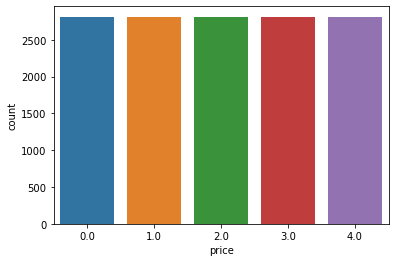

In [35]:
# Distribution of training examples on categories
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['price'])], axis=1)

sns.countplot(x ='price', data = train_data)

<AxesSubplot:xlabel='price', ylabel='count'>

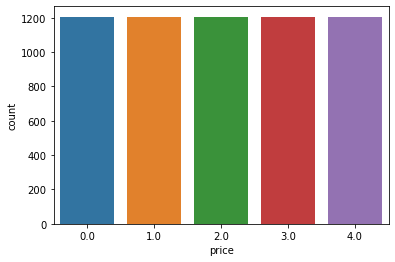

In [38]:
# Distribution of test examples on categories
test_data = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=['price'])], axis=1)

sns.countplot(x ='price', data = test_data)

#  ML Applications 2 methods

In [39]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

def create_cm(y_test, pred):
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(12, 8))
    ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
    ax.xaxis.set_ticklabels(categories, fontsize = 12)
    ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
    ax.set_xlabel('Predicted Labels',fontsize = 15)
    ax.set_ylabel('True Labels',fontsize = 15)

# Decision Tree

In [42]:
dec_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}
tree_grid = GridSearchCV(dec_tree, param_grid=param_dict, cv=5, n_jobs=-1)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

Accuracy of train: 1.0
Accuracy of test: 0.9998341350140986


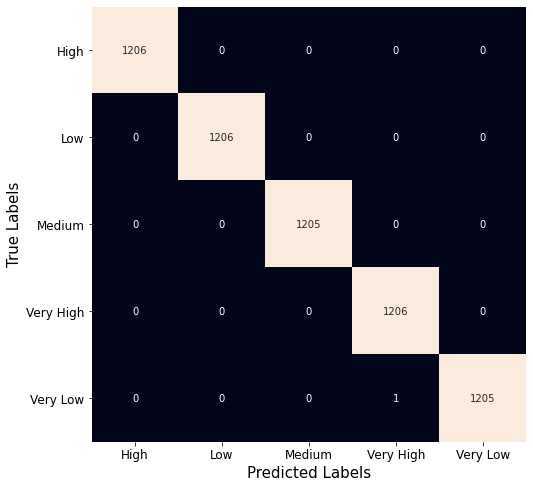

In [44]:
train_score = tree_grid.score(X_train,y_train)
test_score = tree_grid.score(X_test,y_test)

print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)

pred = tree_grid.predict(X_test)
create_cm(y_test, pred)

In [45]:
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1206
           1       1.00      1.00      1.00      1206
           2       1.00      1.00      1.00      1205
           3       1.00      1.00      1.00      1206
           4       1.00      1.00      1.00      1206

    accuracy                           1.00      6029
   macro avg       1.00      1.00      1.00      6029
weighted avg       1.00      1.00      1.00      6029

Precision = 0.9998342999171499
Recall = 0.9998341625207298
Accuracy = 0.9998341350140986
F1 Score = 0.9998341624922242


# KNN Clasification

In [46]:
#model creation
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)

knn_dict = {
    'n_neighbors':range(1,11),
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, param_grid=knn_dict, cv=5, n_jobs=-1)
knn_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=2),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']})

In [47]:
# Best Params
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Accuracy of train: 1.0
Accuracy of test: 0.9384640902305523


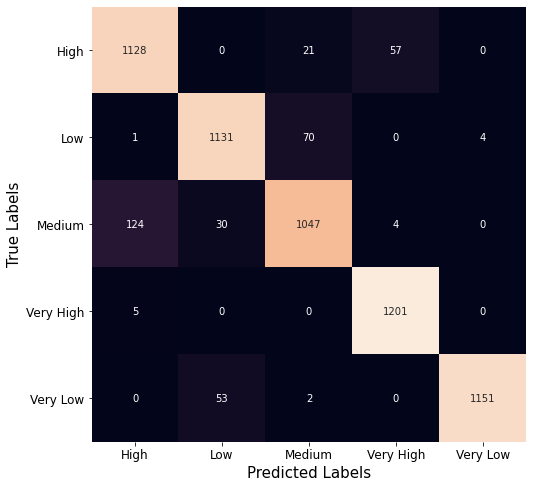

In [51]:
train_score = knn_grid.score(X_train_scaled,y_train)
test_score = knn_grid.score(X_test_scaled,y_test)
print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)

pred = knn_grid.predict(X_test_scaled)
create_cm(y_test, pred)

In [50]:
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1206
           1       0.93      0.94      0.93      1206
           2       0.92      0.87      0.89      1205
           3       0.95      1.00      0.97      1206
           4       1.00      0.95      0.98      1206

    accuracy                           0.94      6029
   macro avg       0.94      0.94      0.94      6029
weighted avg       0.94      0.94      0.94      6029

Precision = 0.938982842753593
Recall = 0.9384525505253813
Accuracy = 0.9384640902305523
F1 Score = 0.938305439865246


In [52]:
# According to the 2 model we can say that decision tree more accurate than knn algorithm. 